In [30]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
%matplotlib notebook

# extract data
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
# check data format
df.sort(['ID','Date']).head()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,ID,Date,Element,Data_Value
55067,USC00200032,2005-01-01,TMIN,-28
55102,USC00200032,2005-01-01,TMAX,67
112671,USC00200032,2005-01-02,TMAX,122
112708,USC00200032,2005-01-02,TMIN,-6
104159,USC00200032,2005-01-03,TMIN,11


In [33]:
# split date column and filter feb 29
df['Year'], df['Month-Date'] = zip(*df['Date'].apply(lambda x: (x[:4], x[5:])))
df = df[df['Month-Date'] != '02-29']
df.head()

,ID,Date,Element,Data_Value,Year,Month-Date
0,USW00094889,2014-11-12,TMAX,22,2014,11-12
1,USC00208972,2009-04-29,TMIN,56,2009,04-29
2,USC00200032,2008-05-26,TMAX,278,2008,05-26
3,USC00205563,2005-11-11,TMAX,139,2005,11-11
4,USC00200230,2014-02-27,TMAX,-106,2014,02-27


In [40]:
# Extract Max temperatures
temp_max = df[(df['Element'] == 'TMAX') & (df['Year'] != '2015')].groupby('Month-Date').aggregate({'Data_Value':np.max})
# # Extract Min temperatures
temp_min = df[(df['Element'] == 'TMIN') & (df['Year'] != '2015')].groupby('Month-Date').aggregate({'Data_Value':np.min})
temp_max.head()

,Data_Value
Month-Date,
01-01,156
01-02,139
01-03,133
01-04,106
01-05,128


In [42]:
# Extract temps for 2015
temp_min_15 = df[(df['Element'] == 'TMIN') & (df['Year'] == '2015')].groupby('Month-Date').aggregate({'Data_Value':np.min})
temp_max_15 = df[(df['Element'] == 'TMAX') & (df['Year'] == '2015')].groupby('Month-Date').aggregate({'Data_Value':np.max})

In [43]:

broken_min = np.where(temp_min_15['Data_Value'] < temp_min['Data_Value'])[0]
broken_max = np.where(temp_max_15['Data_Value'] > temp_max['Data_Value'])[0]


<IPython.core.display.Javascript object>


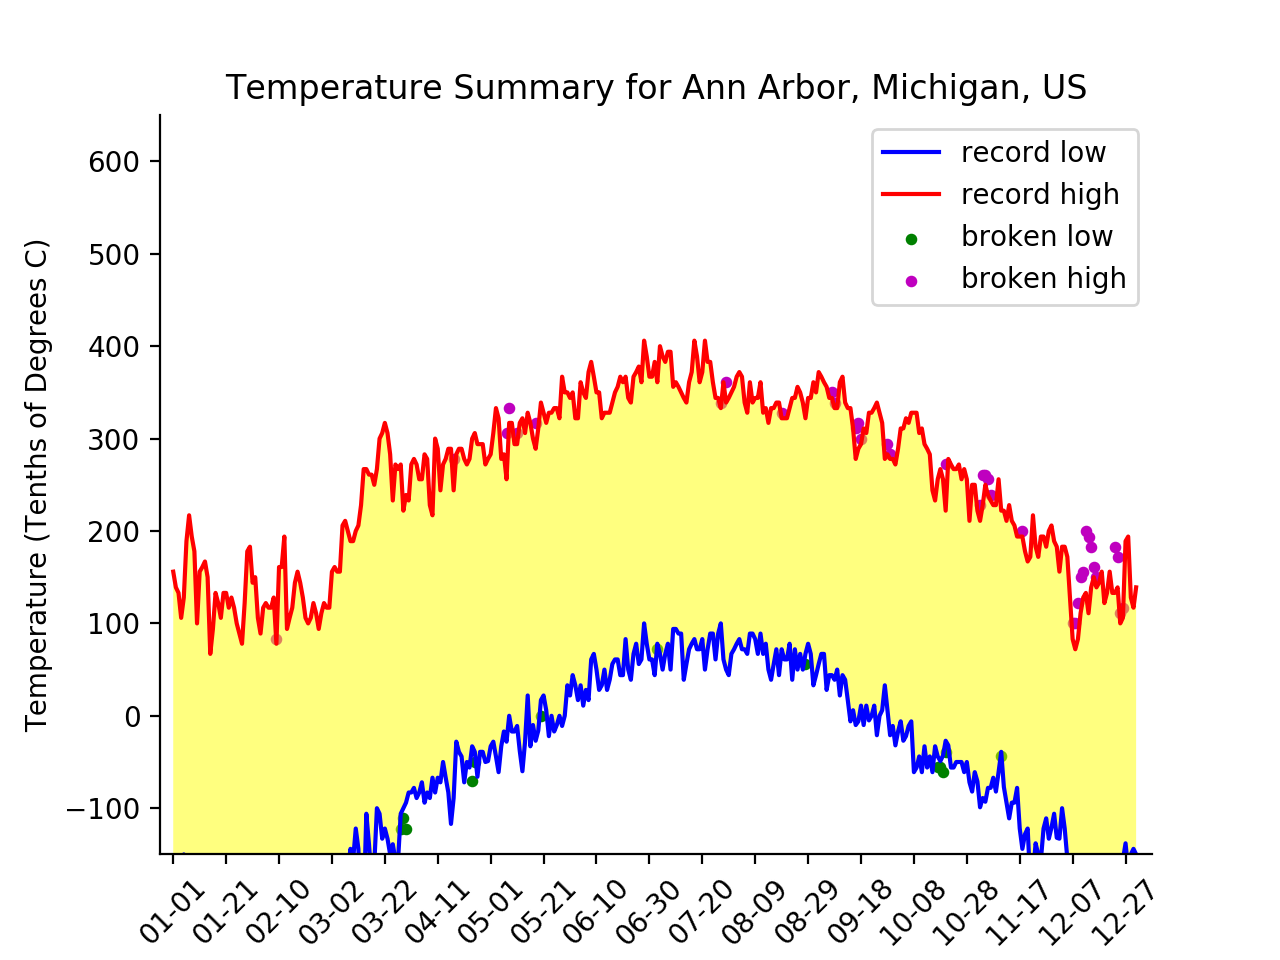

In [49]:
plt.figure()
plt.plot(temp_min.values, 'b', label = 'Record low')
plt.plot(temp_max.values, 'r', label = 'Record high')
plt.scatter(broken_min, temp_min_15.iloc[broken_min], s = 10, c = 'g', label = 'broken low')
plt.scatter(broken_max, temp_max_15.iloc[broken_max], s = 10, c = 'm', label = 'Broken high')
plt.gca().axis([-5, 370, -150, 650])
plt.xticks(range(0, len(temp_min), 20), temp_min.index[range(0, len(temp_min), 20)], rotation = '45')
# label the axes
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Temperature Summary for Ann Arbor, Michigan, US')
plt.legend()
# fill between the ranges
plt.gca().fill_between(range(len(temp_min)), temp_min['Data_Value'], temp_max['Data_Value'], facecolor = 'yellow', alpha = 0.5)
# remove the frame of the chart
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()